In [1]:
from WorldEnvOHEOracle import WorldEnv
import numpy as np
import matplotlib.pyplot as plt

C:\Apps\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Apps\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Apps\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
for i in range(0,30):
    seed_set=i
    env = WorldEnv(n_drones=3,seed=seed_set, max_timesteps=1000)
    observations, infos = env.reset()
    drone_1_location = np.argwhere(env.all_grids[3] == 1)[0]
    drone_2_location = np.argwhere(env.all_grids[4] == 1)[0]
    drone_3_location = np.argwhere(env.all_grids[5] == 1)[0]
    target_location = np.argwhere(env.all_grids[2] == 1)[0]
    human_locations = np.argwhere(env.all_grids[0] == 1)
    safe_locations = np.argwhere(env.all_grids[1] == 1)

    # Convert human and safe locations to sets of tuples for easier lookup
    human_locations_set = set(map(tuple, human_locations))
    safe_locations_set = set(map(tuple, safe_locations))

    # Get paths for each drone
    drone_1_path,drone_1_actions = dijkstra(tuple(drone_1_location), tuple(target_location), set(), human_locations_set, safe_locations_set)
    drone_2_path,drone_2_actions = dijkstra(tuple(drone_2_location), tuple(target_location), set(), human_locations_set, safe_locations_set)
    drone_3_path,drone_3_actions = dijkstra(tuple(drone_3_location), tuple(target_location), set(), human_locations_set, safe_locations_set)

    # Print or return the paths
    print("--------------------------------------------------")
    print(seed_set)
    #print("Drone 1 Path:", drone_1_path)
    #print("Drone 2 Path:", drone_2_path)
    #print("Drone 3 Path:", drone_3_path)
    drone_actions = convert_to_dicts(drone_1_actions,drone_2_actions,drone_3_actions)
    get_visualisation(drone_actions)
    print("Number of steps: ", max(len(drone_1_path),len(drone_2_path),len(drone_3_path)))
    print("--------------------------------------------------")

In [3]:
import numpy as np
import heapq

# Define movement directions: up, down, left, right
MOVEMENTS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Assign different costs for moving into different types of zones
NORMAL_COST = 1        # Cost for normal zones
HUMAN_SAFE_COST = 10   # Higher cost for human or safe zones

# Check if a cell is valid (in bounds)
def is_in_bounds(x, y):
    return 0 <= x <= 10 and 0 <= y <= 10

def convert_to_dicts(drone_1,drone_2,drone_3):
    # Create a list of dictionaries
    dict_list = []

    # Iterate through the values in chunks of group_size
    for drone_1_v,drone_2_v,drone_3_v in zip(drone_1,drone_2,drone_3):
        # Create a dictionary for each group
        dict_entry = {'drone_0': drone_1_v,'drone_1':drone_2_v,'drone_2':drone_3_v}
        dict_list.append(dict_entry)
    
    return dict_list

# Determine the cost of moving into a cell
def get_cell_cost(x, y, human_locations, safe_locations):
    if (x, y) in human_locations or (x, y) in safe_locations:
        return HUMAN_SAFE_COST  # Higher cost for human or safe zones
    return NORMAL_COST  # Normal cost for other zones

# Dijkstra's algorithm for finding the shortest path with different movement costs
def dijkstra(start, target, blocked_cells, human_locations, safe_locations):
    # Priority queue for exploring nodes (stores (cost, x, y))
    pq = []
    heapq.heappush(pq, (0, start))
    
    # Dictionary to store the cost of reaching each node
    g_cost = {start: 0}
    
    # Dictionary to reconstruct the path later
    came_from = {start: None}
    
    while pq:
        # Get the node with the lowest cost
        current_cost, current = heapq.heappop(pq)
        x, y = current
        
        # If we've reached the target, reconstruct the path
        if (x, y) == tuple(target):
            path = []
            directions = []
            while current:
                if came_from[current] != None:
                    dy,dx = np.array(current) - np.array(came_from[current])
                    if (dx == 0) & (dy == 1):
                        direction = 0
                    elif (dx == 1) & (dy == 0):
                        direction = 1
                    elif (dx == 0) & (dy == -1):
                        direction = 2
                    elif (dx == -1) & (dy == 0):
                        direction = 3
                    directions.append(direction)
                path.append(current)
                current = came_from[current]
            return path[::-1],directions[::-1]  # Return reversed path (from start to target)
        
        # Explore neighbors
        for dx, dy in MOVEMENTS:
            neighbor = (x + dx, y + dy)
            if is_in_bounds(neighbor[0], neighbor[1]):
                new_cost = current_cost + get_cell_cost(neighbor[0], neighbor[1], human_locations, safe_locations)
                
                # If this path to the neighbor is shorter, or neighbor hasn't been explored
                if neighbor not in g_cost or new_cost < g_cost[neighbor]:
                    g_cost[neighbor] = new_cost
                    heapq.heappush(pq, (new_cost, neighbor))
                    came_from[neighbor] = (x, y)
    
    return None,None  # If no path is found

# Convert human and safe locations to sets of tuples for easier lookup
human_locations_set = set(map(tuple, human_locations))
safe_locations_set = set(map(tuple, safe_locations))

# Get paths for each drone
drone_1_path,drone_1_actions = dijkstra(tuple(drone_1_location), tuple(target_location), set(), human_locations_set, safe_locations_set)
drone_2_path,drone_2_actions = dijkstra(tuple(drone_2_location), tuple(target_location), set(), human_locations_set, safe_locations_set)
drone_3_path,drone_3_actions = dijkstra(tuple(drone_3_location), tuple(target_location), set(), human_locations_set, safe_locations_set)

# Print or return the paths
print("Drone 1 Path:", drone_1_path)
print("Drone 2 Path:", drone_2_path)
print("Drone 3 Path:", drone_3_path)
drone_actions = convert_to_dicts(drone_1_actions,drone_2_actions,drone_3_actions)

Drone 1 Path: [(1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Drone 2 Path: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Drone 3 Path: [(2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


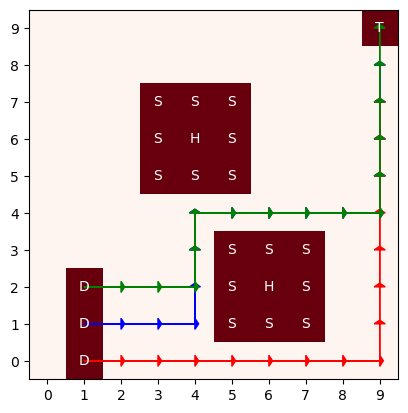

In [4]:
def get_visualisation(all_actions):
    env = WorldEnv(n_drones=3,seed=seed_set, max_timesteps=2000)
    observations, infos = env.reset()
    # Create an empty grid
    fig, ax = plt.subplots()
    grid = np.zeros(env.all_grids[0].shape)
    text_keys = {0:'H',1:'S',2:'T',3:'D',4:'D',5:'D'}
    texts = {'H':[],'S':[],'T':[],'D':[]}
    action_d_conv = {0:[0,1],1:[1,0],2:[0,-1],3:[-1,0]}

    for i,env_grid in enumerate(env.all_grids):
        coords = np.argwhere(env_grid==1)
        for coord in coords:
            texts[text_keys[i]].append(coord)
            grid[coord[0],coord[1]] = 1
            if i == 3:
                current_coords = np.array(coord)
                for actions in all_actions:
                    action = action_d_conv[actions['drone_0']]
                    plt.arrow(current_coords[1], current_coords[0], action[0], action[1], head_width=0.3, head_length=0.1, fc='blue', ec='blue')
                    current_coords[0] = min(9,max(0,current_coords[0] + action[1]))
                    current_coords[1] = min(9,max(0,current_coords[1] + action[0]))
            elif i == 4:
                current_coords = np.array(coord)
                for actions in all_actions:
                    action = action_d_conv[actions['drone_1']]
                    plt.arrow(current_coords[1], current_coords[0], action[0], action[1], head_width=0.3, head_length=0.1, fc='red', ec='red')
                    current_coords[0] = min(9,max(0,current_coords[0] + action[1]))
                    current_coords[1] = min(9,max(0,current_coords[1] + action[0]))
            elif i == 5:
                current_coords = np.array(coord)
                for actions in all_actions:
                    action = action_d_conv[actions['drone_2']]
                    plt.arrow(current_coords[1], current_coords[0], action[0], action[1], head_width=0.3, head_length=0.1, fc='green', ec='green')
                    current_coords[0] = min(9,max(0,current_coords[0] + action[1]))
                    current_coords[1] = min(9,max(0,current_coords[1] + action[0]))

    # Add text annotations
    for key,value in texts.items():
        for v in value:
            ax.text(v[1], v[0], key, ha='center', va='center', color='white')

    # Plot the grid
    plt.imshow(grid, cmap='Reds')
    plt.gca().invert_yaxis()
    #plt.colorbar()
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.yticks([0,1,2,3,4,5,6,7,8,9])
    plt.show()
    
get_visualisation(drone_actions)

# Calculate Reward

In [41]:
reward = 0
for position_x,position_y in drone_1_path:
    flipped_pos = np.array([position_x,position_y])
    if np.array_equal(flipped_pos,target_location):
        reward += env.reward_dictionary[2]
    elif any(np.array_equal(row, flipped_pos) for row in human_locations):
        reward += env.reward_dictionary[0]
    elif any(np.array_equal(row, flipped_pos) for row in safe_locations):
        reward += env.reward_dictionary[1]
        
for position_x,position_y in drone_2_path:
    flipped_pos = np.array([position_x,position_y])
    if np.array_equal(flipped_pos,target_location):
        reward += env.reward_dictionary[2]
    elif any(np.array_equal(row, flipped_pos) for row in human_locations):
        reward += env.reward_dictionary[0]
    elif any(np.array_equal(row, flipped_pos) for row in safe_locations):
        reward += env.reward_dictionary[1]
        
for position_x,position_y in drone_3_path:
    flipped_pos = np.array([position_x,position_y])
    if np.array_equal(flipped_pos,target_location):
        reward += env.reward_dictionary[2]
    elif any(np.array_equal(row, flipped_pos) for row in human_locations):
        reward += env.reward_dictionary[0]
    elif any(np.array_equal(row, flipped_pos) for row in safe_locations):
        reward += env.reward_dictionary[1]
print(reward)

300


In [42]:
print("Number of steps: ", max(len(drone_1_path),len(drone_2_path),len(drone_3_path)))


Number of steps:  12
